# Matplotlib
***
<br>

[Official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)


## What is it?
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python programming language [5].<br>
The library utilises a tree-like hierarchy structure to store its objects for each plot [3]. Matplotlib is a free open-sourced library<br>
which is continually improving. 

## Brief History
Matplotlib development started in the early 2000’s by John D. Hunter, a neurobiologist that emulated MATLAB’s capabilities to help<br> 
visualize electronic signals in the brain of epilepsy patients [1]. Despite MATLAB’s limitations, it’s approach to plotting was retained<br>
in the pyplot sub module which was developed to interface with Matplotlib through a collection of functions [5]. 

## Pyplot
### Overview
This sub module is typically imported from the Matplotlib library under the “plt”alias name and can carry out the majority of Matplotlib’s<br> 
plotting capabilities with relatively intuitive syntax.<br>

Plotting via *pyplot* is considered the stateful approach to plotting with Matplotlib, where calls are made via plt.plot() and other top level<br>
pyplot functions which preserve states to keep track of the current figure and axes [3]. As described in *Python Plotting With Matplotlib <br>
(Guide) 2021*, the simplicity of pyplot’s plotting syntax can be attributed to its wrapper functions that essentially call Matplotlib’s more<br> 
complicated object orientated interface.

### Plotting
pyplots functions can be found here: [pyplot functions](https://matplotlib.org/stable/api/pyplot_summary.html)

The pyplot library can do many different plots via different functions calls. The arguments accepted by the different pytplot plots are<br>
relatively similar, but for simplicity a worked example of a line plot will be explored.

In [1]:

# Import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # for numerical operations

# default figure sizes of future plots in the notebook
plt.rcParams['figure.figsize'] = [10, 6]      


In [2]:

# define plot variables
x = np.arange(0, 6, 0.5)                      # generate list of 0-5 in increments of 0.5
y1 = x ** 2
y2 = x ** 3
y3 = x ** 4

xy1_label = 'f(x)=x'
xy2_label = 'g(x)=x^2'
xy3_label = 'h(x)=x^3'


In [3]:

def line_plot():   
# pass the following arguements into plot():
    # x and y lists of equal length
    # Shorthand string notation for colour / linestyle
    # linewidth value & label string to be utilised by legend() function
    plt.plot(x, y1, 'b--', linewidth = 3, label = xy1_label)  
    plt.plot(x, y2, 'g--', linewidth = 3, label = xy2_label) 
    

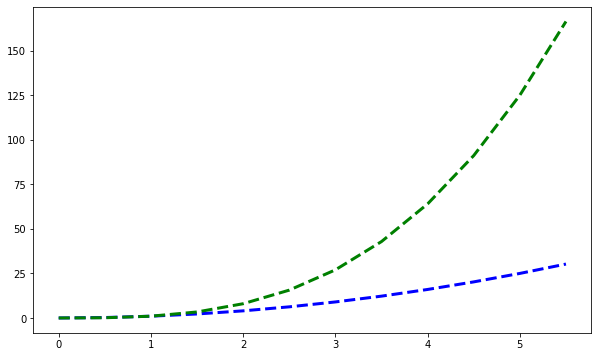

In [4]:
line_plot()

<br>

#### Breakdown of plt.plot()

[Documentation:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  _matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)_

This *plot* functon:
- Accepts list of arguements (**args*) which can form a 2d-array via:
  - Lists of equal lengths (as used in *line_plot* function)
  - Numpy arrays of equal length
  - Keyword strings, such as  panda's dataframe columns
  
  <br>
  
-  View limits autoscale to data limits by default as scalex and scaley are set to True.
-  Data input is defaulted to None but one can pass data object if the object variables are declared.
-  Keyword arguements (***kwargs*) declared in or passed into the *plt.plot()* can format properties  like linewidth and marker color.<br>
One can also use shortcut string notation for some formatting operations (as used in *line_plot* function).

<br>

#### Formatting plots   (MORE TO BE DONE HERE)<br>

matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs) <br>
matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs) <br>
matplotlib.pyplot.legend(*args, **kwargs) <br>

In [5]:

def format_plot():
    # plot format variables
    x_axis_label = 'x_axis'
    y_axis_label = 'y_axis'
    default_fontsize = 12

    # plot format dictionary
    axis_font = {'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 15,
        }

    # call plotting characteristic functions
    plt.xlabel(x_axis_label, fontdict = axis_font)
    plt.ylabel(y_axis_label, fontdict = axis_font)
    plt.xticks(fontsize = default_fontsize)
    plt.yticks(fontsize = default_fontsize)
    plt.legend(bbox_to_anchor = (0, 1.02, 1, 0.2), loc = "lower left", mode = "expand",
               borderaxespad = 0, ncol = 3, fontsize = 17.5)

    ax = plt.gca()                          # define ax variable as current axes if it exists
    ax.set_facecolor('silver')              # call set_facecolur method on ax variable
    

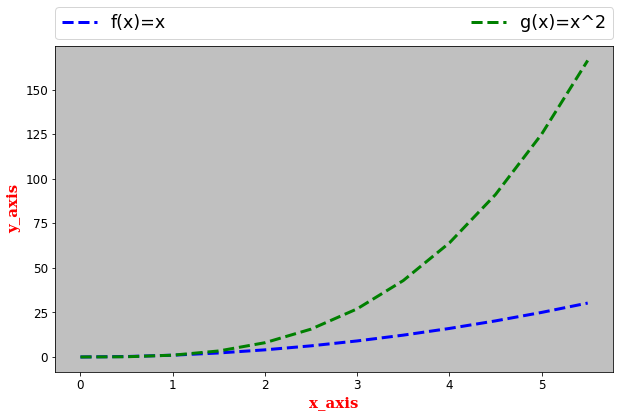

In [6]:

line_plot()
format_plot()
plt.show()


<br>

#### Preserving States

Note that the *line_plot()* function called above did not pass the current figure to the *format_plot()* function, however the reformatting of the<br>
plot still occured. This can be explained by *pyplots* ability to preserve various states enabling it to keep track of the current figure, whereby<br>
functions called are directed to the current axes. It is for this same reason that consecutive *plt.plot()* calls overlay lines on the current figure.<br>
It is also possible to overlay different plot types as shown below with the addition of a scatter series to the plot:


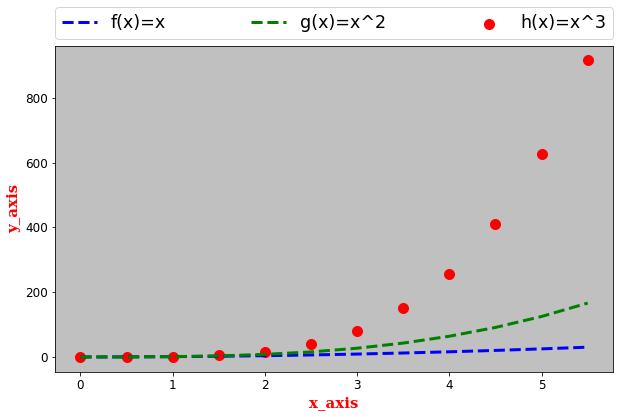

In [7]:

def scatter_plot(): 
    plt.scatter(x, y3, s = 100, c = 'r', marker = 'o', label = xy3_label)
    
line_plot()
scatter_plot()
format_plot()
plt.show()
    

<br>

#### Generating subplots:
**The stateful approach: subplot()**<br>
As per the offical documentation the *subplot* funcion adds an axes to the current figure or retrieves the current axis if it exists. The position<br>
of the subplot is determined by the following integer arguements (nrows, ncols, index), whereby a 2x2 grid will be declared via *subplot(2, 2, n)*,<br>where n is the numerical position of the plot.

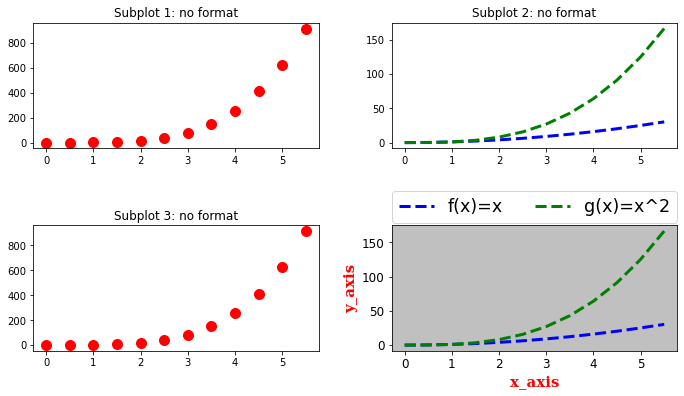

In [8]:

# plot 1
plt.subplot(2, 2, 1) 
scatter_plot()
plt.title('Subplot 1: no format')

# plot 2
plt.subplot(2, 2, 2)
line_plot() 
plt.title('Subplot 2: no format')

# plot 3
plt.subplot(2, 2, 3) 
scatter_plot()
plt.title('Subplot 3: no format')

# plot 4
plt.subplot(2, 2, 4)
line_plot()
format_plot()

plt.tight_layout(pad=2.5)
plt.show()



    
**A Closer look at plt.plot():** <br>

Looking at the plots above the *format_plot()* function did not format subplots 1 - 3. One would need to call the *format_plot()* function after<br> 
each subplot was generated to achieve this. This observation and the previously observed stateful nature of the pyplot outputs are very<br> 
interesting and make one question what is happening under the hood.

In [9]:

# Reference [3]
# Abridged version of plt.plot()
def plot(*args, **kwargs):  
    ax = plt.gca()                      # Get the current Axes instance of the current figure or create one if doesnt exist.
    return ax.plot(*args, **kwargs)

def gca(**kwargs):                                 
    return plt.gcf().gca(**kwargs)      # Get the current Axes of the current Figure.


As shown in the abridged source code for the *plot()* function of the pyplot sub-module, one can quickly see what happening. Each time *plot* is called, <br> 
any arguments passed are used to plot against the current axes of the current figure via the following syntax: _(plt.gca().plot(*args, **kwargs)._This means<br> 
that the axes of the last subplot generated in the subplot sequence were returned in the the code and any additional top level pyplot function<br>
call will act on this axes.  

<br>

**The stateless approach: subplots()**<br>

The *subplots* function creates a layout of subplots enclosed in a figure object. The plot matrix size is determined by the following integer arguments<br>
(nrows, ncols), whereby a 2x2 plot matrix  will be declared via *fig, axes = plt.subplots(2,2)*. Importantly the axes variable (in this case) will contain an array<br>
of axes objects as more than one subplot was generated. As shown in the code below one can plot directly onto the already generated axes and even<br>
reformat the subplots via looping over the axes which provides dynamic multi-plot control.


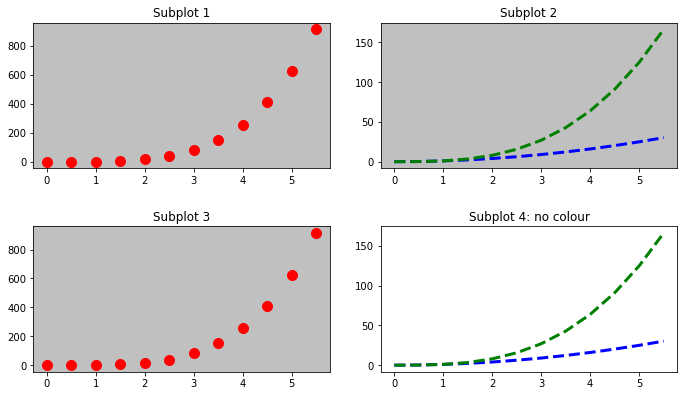

In [10]:

fig, axes = plt.subplots(2, 2)

test = axes[0, 1].plot(x, y1, 'b--', linewidth = 3, label = xy1_label) 
axes[0, 1].plot(x, y2, 'g--', linewidth = 3, label = xy2_label)
axes[1, 1].plot(x, y1, 'b--', linewidth = 3, label = xy1_label)  
axes[1, 1].plot(x, y2, 'g--', linewidth = 3, label = xy2_label)
axes[0, 0].scatter(x, y3, s = 100, c = 'r', marker = 'o', label = xy3_label)
axes[1, 0].scatter(x, y3, s = 100, c = 'r', marker = 'o', label = xy3_label)

# loop over axes objects in the figure object
for plot_index, ax in enumerate(fig.axes):  
    if plot_index < 3:    
        ax.set_facecolor('silver')
        ax.set_title(str("Subplot ") + str(plot_index+1))     
    else:     
        ax.set_title(str("Subplot ") + str(plot_index + 1) + ': no colour')
 
fig.tight_layout(pad = 2.5)
plt.show()


In [111]:
# potentially useful
# advanced formatiing 
def add_data_labels():
    # annotate at each x, y position in plot with text from list   
    data_labels = np.arange(0, 13, 1)
    for count, label in enumerate(data_labels):
        plt.annotate(label, (x[count], y2[count]))


### Plotting

## important links
matplotlib summary:  https://towardsdatascience.com/a-practical-summary-of-matplotlib-in-13-python-snippets-4d07f0011bdf <br>
matplotlib history:  https://matplotlib.org/stable/users/history.html <br>
matplotlib overview:  https://matplotlib.org/stable/api/index.html#usage-patterns <br>
matplotlib tutorials:  https://matplotlib.org/stable/tutorials/index.html <br>
realPython plotting:  https://realpython.com/python-matplotlib-guide/ <br>

realPython generating random data:  https://realpython.com/python-random/

## References

[1]. What is Matplotlib? (2021), viewed 08 October 2021, https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.01-What-is-Matplotlib/ .<br>
[2] Nyquist, K 2020, Seeing state-based and object-oriented programming side-by-side, towardsdatascience, viewed 17 October 2021,<br>
https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d <br>
[3].Python Plotting With Matplotlib (Guide), The Matplotlib Object Hierarchy 2021, viewed 11 October 2021, https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches.<br>
[4].Python Plotting With Matplotlib (Guide), Stateful Versus Stateless Approaches 2021, viewed 11 October 2021, https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches.<br>
[5] J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.<br>


<br/>

## Fundamentals of Data Analysis GMIT Assignment
This repository contains all the files relevant to my 2021 Fundamentals of Data Analysis module.<br />
***

<br />
<br />

## Contents of repository:<br />

### Jupyter notebooks:  <br />
1. **matplotlib.pyplot.ipynb**: <br />  
    - Contains overview of the matplotlib.pyplot Python package with in-depth explanation<br />
      of three plots from the package. <br />
    - Quicklinks below: *nbviewer* for static, *binder* for dymanic:<br />
        
        <br />
        
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/CiaranMoran27/Fundamentals-of-Data-Analysis/blob/main/pyplot.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CiaranMoran27/Fundamentals-of-Data-Analysis/HEAD?filepath=pyplot.ipynb) <br />
     
   <br />
   <br />

      
2. **cao.ipynb**: <br />  
    - Contains overview of how to load CAO points info. from the CAO website into a pandas <br /> 
      data frame, along with a detailed comparison of CAO points in 2019, 2020, and 2021.
    - Quicklink: Click below for static view: <br />
        
       <br />
        
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/CiaranMoran27/Fundamentals-of-Data-Analysis/blob/main/cao.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CiaranMoran27/Fundamentals-of-Data-Analysis/HEAD?labpath=cao.ipynb)
<br />
<br />

### Requirements.txt file:
This file contains the packages necessary to run the two notebooks. The binder quicklink <br/> 
calls this file and installs the packages listed within allowing the user to easily interact <br/> with the notebooks.

<br />


## How to run the notebook

1. Download [Anaconda](https://docs.anaconda.com/anaconda/install/index.html), this contains the python 
interpreter and all the libraries needed to run this notebook.
2. Download [cmder](https://cmder.net/) if working on a Windows operating system.
3. Run '*jupyter lab*' command on:
    - *Cmder* if working on a Windows operation system.
    - *Command line interface* if working on a Linux or Mac operating system.
    
    <br />
    
## Note:
Although Anacondas contains the required packages to run the listed notebooks, one can download <br />
 package requirements via running the following command: <br />

``` Python
pip install -r /path/to/requirements.txt
```





